In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import *
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
for i in range(0, 10):
    similar_user = 0
    for j in range(0, 10):
        if i != j:
            x1 = raitings[i]
            x2 = raitings[j]

            cos_users = np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
            
            if cos_users > similar_user:
                similar_user = cos_users
                user = j
    print(f'На {i} пользователя больше всего похож пользователь {user}')

На 0 пользователя больше всего похож пользователь 8
На 1 пользователя больше всего похож пользователь 4
На 2 пользователя больше всего похож пользователь 9
На 3 пользователя больше всего похож пользователь 9
На 4 пользователя больше всего похож пользователь 8
На 5 пользователя больше всего похож пользователь 9
На 6 пользователя больше всего похож пользователь 3
На 7 пользователя больше всего похож пользователь 5
На 8 пользователя больше всего похож пользователь 0
На 9 пользователя больше всего похож пользователь 2


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Можно использовать SVD метод

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
svd = TruncatedSVD(n_components=5)
new_raitings = svd.fit_transform(raitings)
new_raitings

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python.

In [6]:
from sympy import diff, cos, sin, tan, symbols
from scipy.misc import derivative

In [7]:
def f(x):
    return (tan(sin(x) + cos(2*x+3)))**2

x = symbols('x')
print(f"f'(x) = {diff(f(x))}")
print(f"f'(1) = {derivative(f, 1.0, dx=1e-6)}")

f'(x) = 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
f'(1) = 55.3859176433136


и на бумаге (просто подставить точку в производную и ничего не упрощать)

f'(1) = 2*(-2*sin(5) + cos(1))*(tan(sin(1) + cos(5))**2 + 1)*tan(sin(1) + cos(5))

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [8]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [9]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [10]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

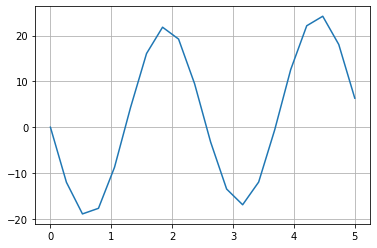

In [11]:
plt.plot(x, fx)
plt.grid()
plt.show()

In [12]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [13]:
params = [0, 0]

res = minimize(error, params)

print('a =', res.x[0])
print('b =', res.x[1])

a = 2.4299592460351045
b = 0.20160452218345778


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

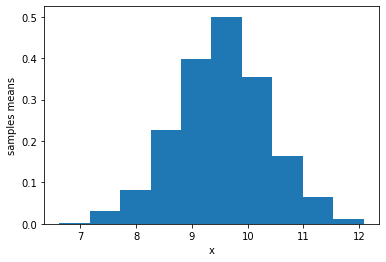

In [14]:
sp = range(20)
data = [np.mean([np.random.choice(sp) for i in range(50)]) for j in range(1000)]

plt.hist(data, density=True)
plt.ylabel('samples means')
plt.xlabel('x')
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python)

[[1, 4],

 [1, 1]]

In [15]:
#собственные вектора
m = np.array([[1, 4], [1, 1]])

w, v = np.linalg.eig(m)
for i in range(len(w)):
    print(f"Собственное значение {w[i]}")
    print(f"соответствующий ему собственный вектор {v[i]}")

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]


#### и на бумаге

Матрица $\begin{pmatrix}1 & 4\\ 1 & 1\end{pmatrix} $

Определитель матрицы $\begin{vmatrix}1 - \lambda & 4\\ 1 & 1 - \lambda\end{vmatrix} = 0 $

$(1 - \lambda)^2-4 = 0$

$(1 - \lambda)^2 = 4$

$1 - \lambda = 2 ;  1 - \lambda = -2$

$\lambda_1 = -1 ; \lambda_2 = 3 $

$\begin{equation*}
     \begin{cases}
       2x + 4y = 0
       \\
       x + 2y = 0
    \end{cases}
   \end{equation*}\;\;$

$\Rightarrow\;$ $ x = -2y$

$\begin{pmatrix}2 \\ -1\end{pmatrix} $ - первый собственный вектор

$\begin{equation*}
 \begin{cases}
   -2x + 4y = 0, 
   \\
   x - 2y = 0.
 \end{cases}
\end{equation*}\;\;$

$\Rightarrow\;$ $ x = 2y$

$\begin{pmatrix}2 \\ 1\end{pmatrix} $ - второй собственный вектор